<a href="https://colab.research.google.com/github/Cul-Dude/Facial-Emotion-Detection/blob/main/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT OVERVIEW

We have 20000 facial images with their associated facial expression labes and around 2000 images with their facial key-point annotations.


We will build 2 model,which will detect 2 things:-

1) Their emotions(either they are happy, or sad, or angry, or surprized,etc).

2) Their key facial points(i.e, the location or coordinates of key facial points like left eye center, left eye edges, right eye etc.)


Thus, in this project we will train two completely independent models, with completely different datsets, and then run both the models parallely, and based on these two model's predictions, we would be able to come up with a more holistical prediction of people's emotion.




#FACIAL KEY POINTS DETECTION

In this, we will build a model in which we will feed an image and then we will be able to detect all key facial points in that image.

 We will create a deep learning model based on Convulutional Neural Network and Residual Blocks to predict facial key-points

The input images are 96 X 96 pixels gray-scale images. And for each image we have the x an y coordinates of 15 facial key points.



# IMPORTING NECESSARY DATASET AND LIBRARIES

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/EmotionDataset

/content/drive/My Drive/EmotionDataset


In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, ZeroPadding2D, Add
from keras.models import Model
from keras.initializers import glorot_uniform
from keras.optimizers import Adam

In [ ]:
# load facial key points data
keyfacial_df = pd.read_csv('/content/drive/My Drive/EmotionDataset/Emotion AI Dataset/data.csv')

In [ ]:
keyfacial_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
# to relavant information about the dataframe
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

Thus we have total 31 columns, in which the first 30 columns are x and y coordinates of 15 facial key points.(Since datatype for them is float64).  


The last column is the actual value of all 96 X 96 pixel of each images(0-255 pixels, 0 represent black pixel, 255 represent white)


Also we have no null values for all 2140 images.

Now as pixel values are given space separated string, we need to convert into a 2D numpy array of shape (96,96)

In [ ]:
#in between numbers in the string we have space, thus we separate the values using ' ' as separator.
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [ ]:
keyfacial_df['Image'][0]
# finally converted it

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

# IMAGE VISUALIZATION

 Here, we plot a random image from the dataset along with facial keypoints using plt.imshow

 Since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,.. thus we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.




<ipython-input-9-f5746856fcbe>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


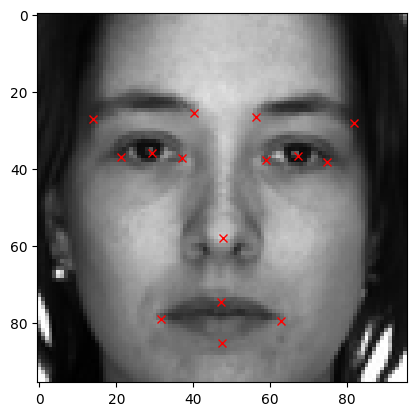

In [ ]:
i = np.random.randint(1, len(keyfacial_df)) # pick 1 random row(i.e, an image to plot)
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray') # printing out just the image
for j in range(1, 31, 2): # loop to mark all the 15 facial points using a red cross on that image
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')
        # keyfacial_df.loc[i][j-1]---> 0th column(since we start from j=1)
        # keyfacial_df.loc[i][j]---> 1st column(since we start from j=1)

<ipython-input-10-ef67639cf87f>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


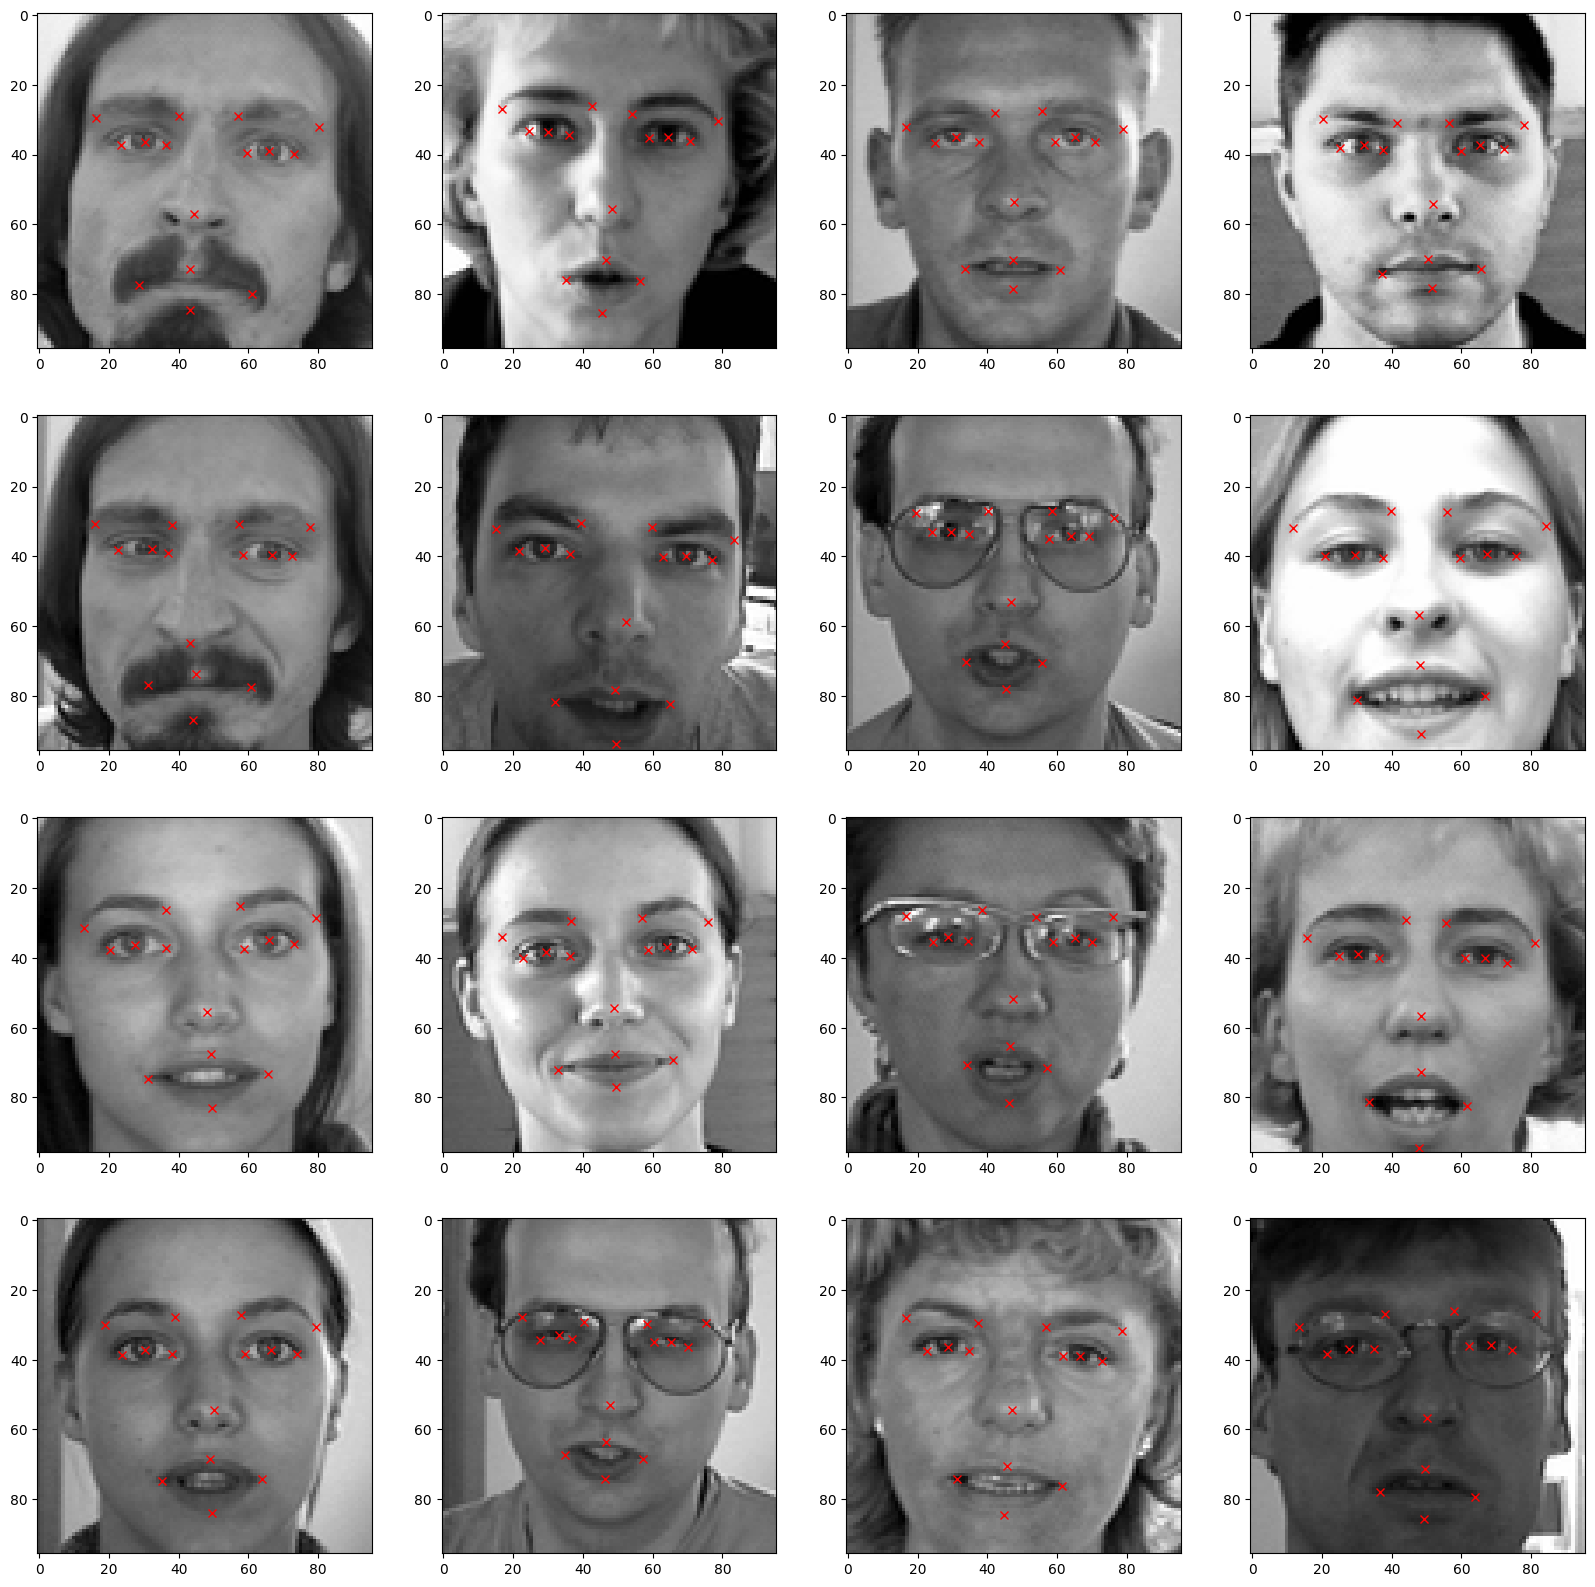

In [ ]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')



Thus we can see that the data on which the model will train seems to be pretty accurate(as the facial points are marked correctly for most of the images).

# IMAGE AUGMENTATION

Instead of just relying on the given dataset, we create new datasets from the original ones, on which the model will train, like flip them vertically, or increase the brightness of image, or darken the image, or zoom in, etc. By doing this, we are improving the generalization capabilities of the model.(We want our AI model to see literally everything it can).

## FLIPPING HOIZONTALLY

In [ ]:
# Create a new copy of the dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
# Horizontal Flip - flip the images along y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))
columns = keyfacial_df_copy.columns[:-1]
# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

Now, to check if we have flipped it correctly, we will see one pair

<ipython-input-13-492c9503c671>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')


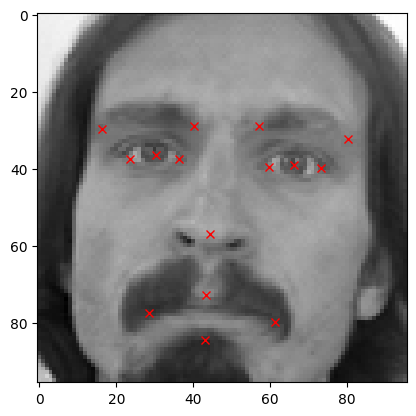

In [ ]:
# Show the 1st Original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

<ipython-input-14-83f4f2e3df71>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


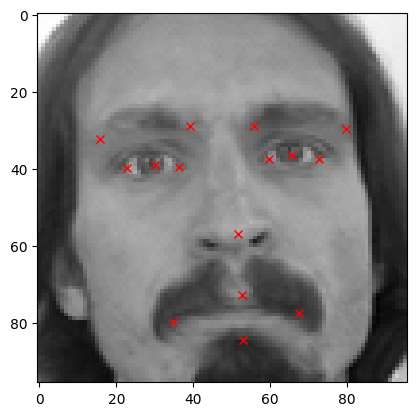

In [ ]:
# Show its Horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

## FLIPPING VERTICALLY

In [ ]:
keyfacial_df_copy1 = copy.copy(keyfacial_df)

In [ ]:
# Flip along x-axis and note that if we are flipping along x-axis, x co-ordinates won't change
keyfacial_df_copy1['Image'] = keyfacial_df_copy1['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy1[columns[i]] = keyfacial_df_copy1[columns[i]].apply(lambda x: 96. - float(x) )

<ipython-input-17-f2097e71ce31>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy1.loc[0][j-1], keyfacial_df_copy1.loc[0][j], 'rx')


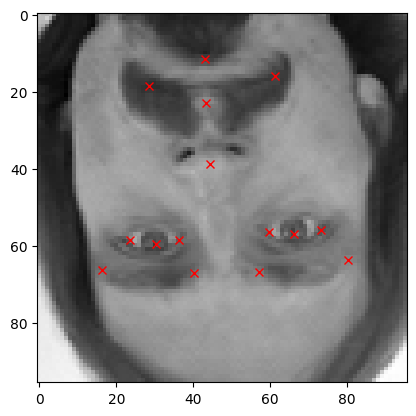

In [ ]:
# Show its Horizontally flipped image
plt.imshow(keyfacial_df_copy1['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy1.loc[0][j-1], keyfacial_df_copy1.loc[0][j], 'rx')

Now, we have three dataframes, one containing original images and one containing the horizontal flips and verticle of those. So to work on all the data easily we will merge all of them.

In [ ]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy,keyfacial_df_copy1))
augmented_df.shape

(6420, 31)

## RANDOMLY INCREASING BRIGHTNESS

In [ ]:
# Randomingly increasing the brightness of the original images
# We multiply pixel values by random values between 1.5 and 2 to increase the brightness of the image
# we clip the value between 0 and 255(so that the pixel value doesn't go over 255 )

import random

keyfacial_df_copy2 = copy.copy(keyfacial_df)
keyfacial_df_copy2['Image'] = keyfacial_df_copy2['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))

<ipython-input-20-386aedb80590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy2.loc[0][j-1], keyfacial_df_copy2.loc[0][j], 'rx')


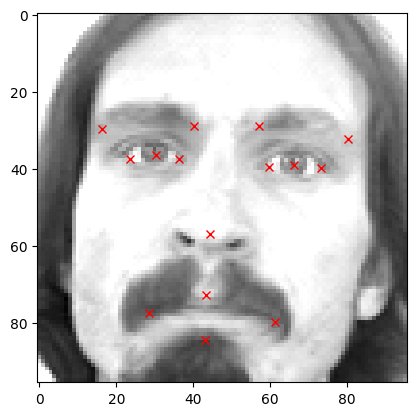

In [ ]:
# Show Image with increased brightness
plt.imshow(keyfacial_df_copy2['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy2.loc[0][j-1], keyfacial_df_copy2.loc[0][j], 'rx')

Now again we augment it.

In [ ]:
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy2))
augmented_df.shape

(8560, 31)

# DATA NORMALIZATION AND TRAINING DATA PREPARATION

Data normalization will make our life much easier as it will generate more accurate results, and will have lesser mathematical computations.

Pixel range is from 0-255. So we normalise the values from 0-1.

In [ ]:
img = augmented_df[:,30] # get all the rows and only the last column
img

array([array([[238, 236, 237, ..., 250, 250, 250],
              [235, 238, 236, ..., 249, 250, 251],
              [237, 236, 237, ..., 251, 251, 250],
              ...,
              [186, 183, 181, ...,  52,  57,  60],
              [189, 188, 207, ...,  61,  69,  78],
              [191, 184, 184, ...,  70,  75,  90]]),
       array([[219, 215, 204, ...,  92,  88,  84],
              [222, 219, 220, ...,  92,  88,  86],
              [231, 224, 212, ...,  77,  80,  84],
              ...,
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1]]),
       array([[144, 142, 159, ..., 208, 207, 207],
              [143, 142, 161, ..., 208, 208, 207],
              [143, 140, 160, ..., 209, 209, 207],
              ...,
              [ 66,  70,  69, ...,  81, 134, 194],
              [ 65,  69,  71, ...,  75,  83, 109],
              [ 65,  68,  70, ...,  78,  78,  77]]), ...,
       array([

In [ ]:
# Normalize the images
img = img/255.
img

array([array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.98039216, 0.98039216,
               0.98039216],
              [0.92156863, 0.93333333, 0.9254902 , ..., 0.97647059, 0.98039216,
               0.98431373],
              [0.92941176, 0.9254902 , 0.92941176, ..., 0.98431373, 0.98431373,
               0.98039216],
              ...,
              [0.72941176, 0.71764706, 0.70980392, ..., 0.20392157, 0.22352941,
               0.23529412],
              [0.74117647, 0.7372549 , 0.81176471, ..., 0.23921569, 0.27058824,
               0.30588235],
              [0.74901961, 0.72156863, 0.72156863, ..., 0.2745098 , 0.29411765,
               0.35294118]])                                                   ,
       array([[0.85882353, 0.84313725, 0.8       , ..., 0.36078431, 0.34509804,
               0.32941176],
              [0.87058824, 0.85882353, 0.8627451 , ..., 0.36078431, 0.34509804,
               0.3372549 ],
              [0.90588235, 0.87843137, 0.83137255, ..., 0.301960

Now the images are normalised

In [ ]:
# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [ ]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

Now splitting the dataset into train and test


In [ ]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(6848, 96, 96, 1)

In [ ]:
X_test.shape

(1712, 96, 96, 1)

# BUILDING DEEP RESIDUAL NEURAL NETWORK FOR FACIAL KEY POINTS DETECTION

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
output_layer = Dense(30, activation = 'relu')(X) # Assign the output of the last layer to a variable


model_1_facialKeyPoints = Model( inputs= X_input, outputs = output_layer) # Use the output layer as the model output
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

# COMPILE AND TRAIN FACIAL-KEY-POINTS DETECTION DEEP LEARNING MODEL

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

To save best model with least validation loss, we put a checkpoint which has least validation loss

The callback saves only the model weights that achieve the best performance on the validation data. This helps prevent overfitting.

In [ ]:
checkpointer = ModelCheckpoint(filepath="FacialKeyPoints_weights.weights.h5",
                               verbose=1,
                               save_best_only=True,
                               save_weights_only=True)  # Ensure save_weights_only is True

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/50
204/204 [==============================] - ETA: 0s - loss: 332.6455 - accuracy: 0.5042
Epoch 1: val_loss improved from inf to 747.58057, saving model to FacialKeyPoints_weights.weights.h5
204/204 [==============================] - 52s 217ms/step - loss: 332.6455 - accuracy: 0.5042 - val_loss: 747.5806 - val_accuracy: 0.4315
Epoch 2/50
204/204 [==============================] - ETA: 0s - loss: 145.9645 - accuracy: 0.6927
Epoch 2: val_loss improved from 747.58057 to 274.41721, saving model to FacialKeyPoints_weights.weights.h5
204/204 [==============================] - 31s 154ms/step - loss: 145.9645 - accuracy: 0.6927 - val_loss: 274.4172 - val_accuracy: 0.5423
Epoch 3/50
204/204 [==============================] - ETA: 0s - loss: 115.1049 - accuracy: 0.6624
Epoch 3: val_loss improved from 274.41721 to 144.62016, saving model to FacialKeyPoints_weights.weights.h5
204/204 [==============================] - 32s 155ms/step - loss: 115.1049 - accuracy: 0.6624 - val_loss: 144.6202 

In [ ]:
# save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


# ASSESSING THE FACIAL KEY POINTS DETECTION MODEL'S PERFORMANCE

In [ ]:

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

54/54 [==============================] - 2s 34ms/step - loss: 116.2427 - accuracy: 0.7915
Accuracy : 0.7914719581604004


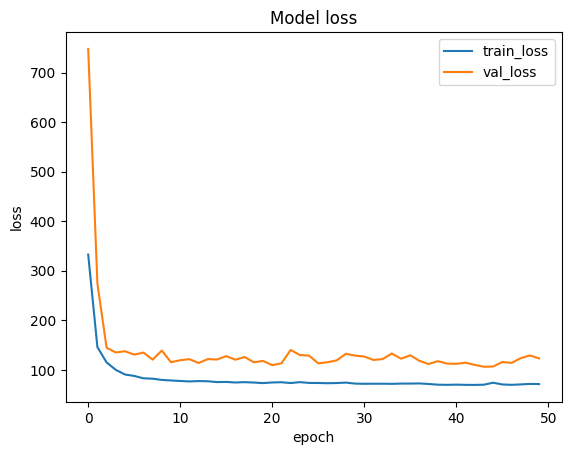

In [ ]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

 We can see that the learning curve looks pretty good

 That's half the work done! Now we need to build second model for facial expression detection.

# FACIAL EXPRESSION (EMOTION) DETECTION MODEL

The second model will classify people's emotion.

This model will predict/ classify the facial expressions of people into 5 different categories

0-> Angry

1-> Disgust

2-> Sad

3-> Happy

4-> Surprise


# IMPORT DATASET FOR FACIAL EXPRESSION DETECTION

In [ ]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('/content/drive/MyDrive/EmotionDataset/Emotion AI Dataset/icml_face_data.csv')

In [ ]:
facialexpression_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


The data is simple. One column tells us the emotion of the picture given in second column.

The image which we are given is of size 46 X 46 pixels. That too given in string format.

Thus,first we will convert the string to actual 48 X 48 sized 2D array, and then will resize it to 96 X 96 as the first model is trained on 96 X 96 image.

In [ ]:
# function to convert pixel values in string format to array format
# this function will be applied on each row of the data

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Resize images from (48, 48) to (96, 96)

def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [ ]:
# check the shape of data_frame
facialexpression_df.shape

(24568, 2)

In [ ]:
# check for the presence of null values in the data frame
facialexpression_df.isnull().sum()

,0
emotion,0
pixels,0


In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

# VISUALIZE IMAGES AND PLOT LABELS

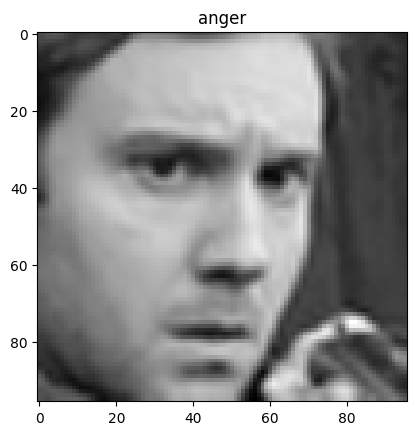

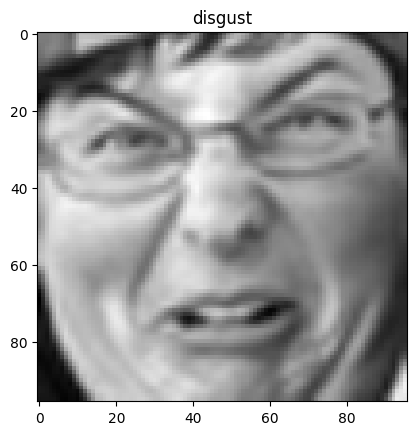

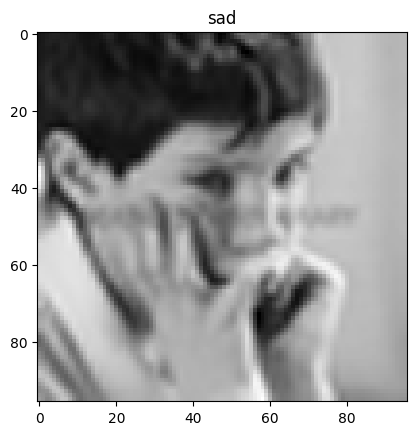

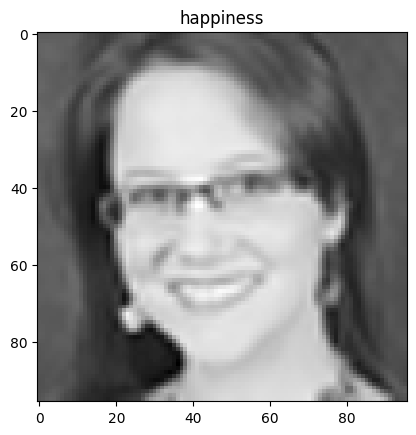

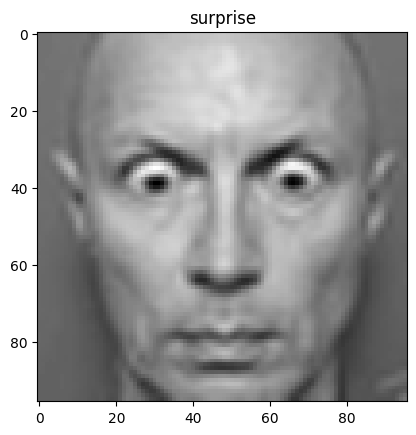

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i]) # to tell the emotion of that image
  plt.imshow(img, cmap = 'gray')

Now we will see how many sample images are present per emotion. In this way we would be able to tell if we have equal amount of pictures for each emotion or not.

<Axes: xlabel='emotion', ylabel='count'>

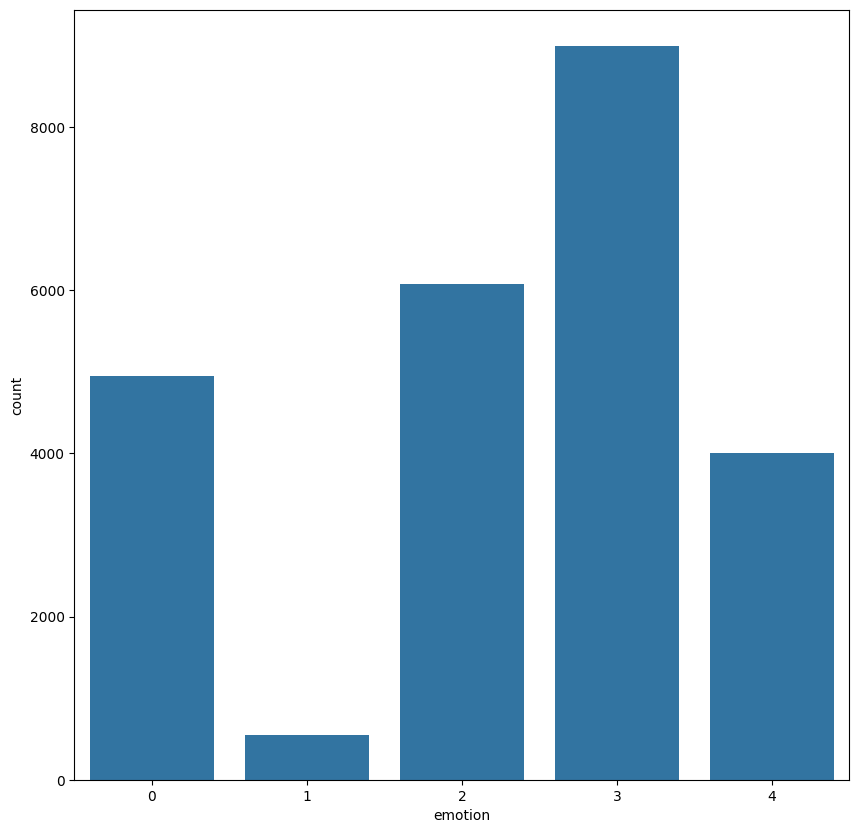

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

We have a very extreme unbalanced dataset

Class 1- has very low number of image. Thus when we train the model, then it will have low data for this class. Thus we perform data augmentation on this class so that our model can be trained better for this class.

# DATA PREPARATION AND IMAGE AUGMENTATION

First we divide the data into input and output.

In [ ]:
# split the dataframe in to features and labels
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
X

,pixels
0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."
...,...
24563,"[[-4.901001, 5.6496277, 22.477203, 49.366516, ..."
24564,"[[181.71645, 179.72063, 176.40785, 175.93037, ..."
24565,"[[178.1166, 176.83118, 174.74146, 172.61276, 1..."
24566,"[[16.883408, 16.953583, 17.081573, 16.53476, 1..."


This is stored in single array, thus we have to resize it

In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

In [ ]:
X

array([[[[ 6.93169250e+01],
         [ 7.30386505e+01],
         [ 7.91371918e+01],
         ...,
         [ 4.07361908e+01],
         [ 4.06584015e+01],
         [ 4.05393982e+01]],

        [[ 6.86632538e+01],
         [ 7.09522400e+01],
         [ 7.47176819e+01],
         ...,
         [ 4.32747650e+01],
         [ 4.20371857e+01],
         [ 4.12236176e+01]],

        [[ 6.77688141e+01],
         [ 6.77164612e+01],
         [ 6.76717224e+01],
         ...,
         [ 4.73947296e+01],
         [ 4.42632904e+01],
         [ 4.23146515e+01]],

        ...,

        [[ 7.48902130e+01],
         [ 7.67955322e+01],
         [ 7.99025879e+01],
         ...,
         [ 7.14634247e+01],
         [ 5.93287506e+01],
         [ 5.17473602e+01]],

        [[ 7.66812592e+01],
         [ 7.58081055e+01],
         [ 7.42545166e+01],
         ...,
         [ 9.39433746e+01],
         [ 7.97793427e+01],
         [ 7.11324615e+01]],

        [[ 7.76385803e+01],
         [ 7.51507416e+01],
         [

In [ ]:
y
# we have used to_categorical function. Thus if first column is 1 it means the class is 0 if second column is 2 it means the class is 1 and so on

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
X_train

array([[[[0.24981354],
         [0.2777828 ],
         [0.32440802],
         ...,
         [0.38976136],
         [0.3270707 ],
         [0.28975022]],

        [[0.26409337],
         [0.28763828],
         [0.32705203],
         ...,
         [0.38744783],
         [0.33757037],
         [0.30800912]],

        [[0.28701627],
         [0.30346277],
         [0.33130786],
         ...,
         [0.38364834],
         [0.35458985],
         [0.33763176]],

        ...,

        [[0.1853573 ],
         [0.17805175],
         [0.16637035],
         ...,
         [0.19937187],
         [0.19363254],
         [0.19064797]],

        [[0.18814817],
         [0.18448606],
         [0.17897135],
         ...,
         [0.18591674],
         [0.18828838],
         [0.19008455]],

        [[0.18962798],
         [0.18830189],
         [0.1867376 ],
         ...,
         [0.1778769 ],
         [0.18506159],
         [0.18969421]]],


       [[[0.99215686],
         [0.99258494],
         [0.99

In [ ]:
print(X_val.shape, y_val.shape)
print(X_Test.shape, y_Test.shape)
print(X_train.shape, y_train.shape)

(1228, 96, 96, 1) (1228, 5)
(1229, 96, 96, 1) (1229, 5)
(22111, 96, 96, 1) (22111, 5)


Now we will perform some image augmentation. For the first model, we manually wrote code for flipping and increasing brightness. But here we will use ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5], #increase brightness
    fill_mode = "nearest")

# Note on "Brightness_range"
# 1.0 does not affect image brightness
# numbers less than 1.0 darken the image [0.5, 1.0]
# numbers larger than 1.0 brighten the image [1.0, 1.5]


# BUILDING AND TRAINING THE DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

We will use the res block which we used earlier

In [ ]:
input_shape = (96, 96, 1) # matching the input shape to match with previous model

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)


# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 102, 102, 1)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_1[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']        

In [ ]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.weight.h5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.weights.h5", verbose = 1, save_best_only=True,save_weights_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 50, callbacks=[checkpointer, earlystopping])

Epoch 1/50
345/345 [==============================] - ETA: 0s - loss: 1.5028 - accuracy: 0.3666
Epoch 1: val_loss improved from inf to 1.44583, saving model to FacialExpression_weights.weights.h5
345/345 [==============================] - 62s 161ms/step - loss: 1.5028 - accuracy: 0.3666 - val_loss: 1.4458 - val_accuracy: 0.3632
Epoch 2/50
345/345 [==============================] - ETA: 0s - loss: 1.3824 - accuracy: 0.4082
Epoch 2: val_loss improved from 1.44583 to 1.44353, saving model to FacialExpression_weights.weights.h5
345/345 [==============================] - 54s 155ms/step - loss: 1.3824 - accuracy: 0.4082 - val_loss: 1.4435 - val_accuracy: 0.2614
Epoch 3/50
345/345 [==============================] - ETA: 0s - loss: 1.3073 - accuracy: 0.4372
Epoch 3: val_loss improved from 1.44353 to 1.32923, saving model to FacialExpression_weights.weights.h5
345/345 [==============================] - 53s 153ms/step - loss: 1.3073 - accuracy: 0.4372 - val_loss: 1.3292 - val_accuracy: 0.4560
Ep

In [ ]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

# PERFORMANCE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [ ]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 2s 27ms/step - loss: 0.6963 - accuracy: 0.7266
Test Accuracy: 0.7266070246696472


We got accuracy of approx 73% in test data

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

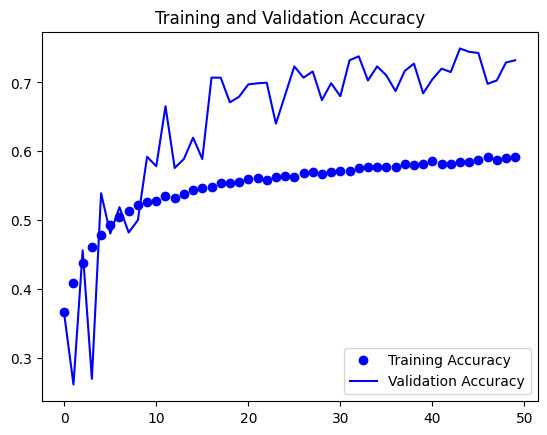

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

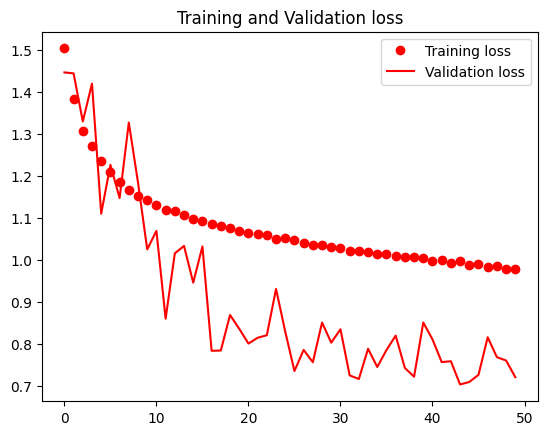

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 [==============================] - 1s 27ms/step


In [ ]:
y_true.shape

(1229,)

Now seeing the confusion matrix


<Axes: >

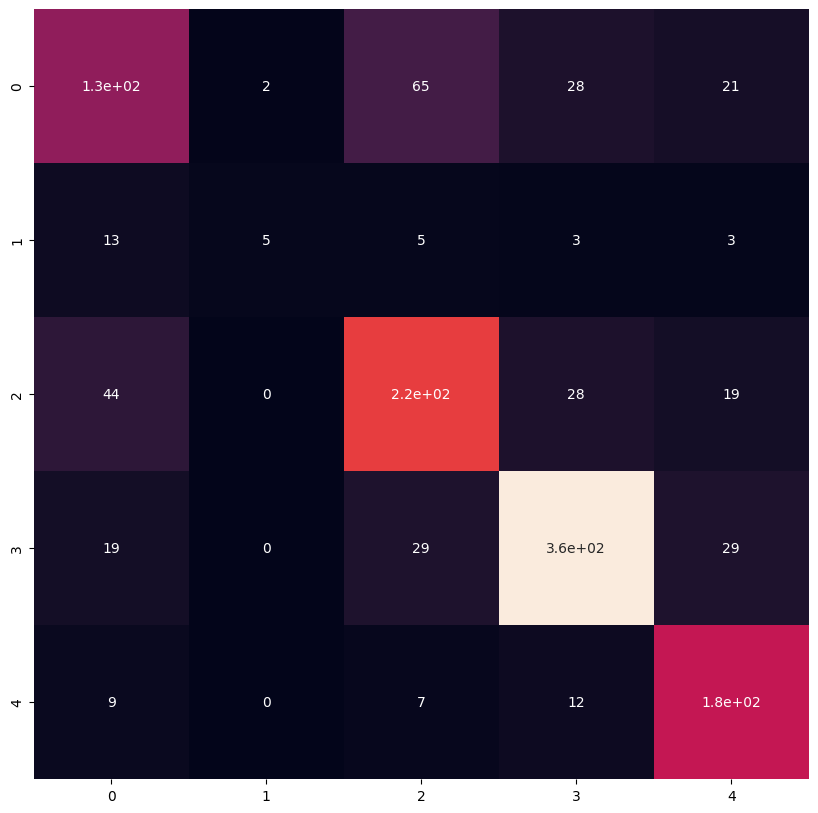

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

We can see the image and model's prediction and actual prediction,

Notice how prediction for 1 emotion isn't accurate, as the images for 1 isn't much for the model to train.

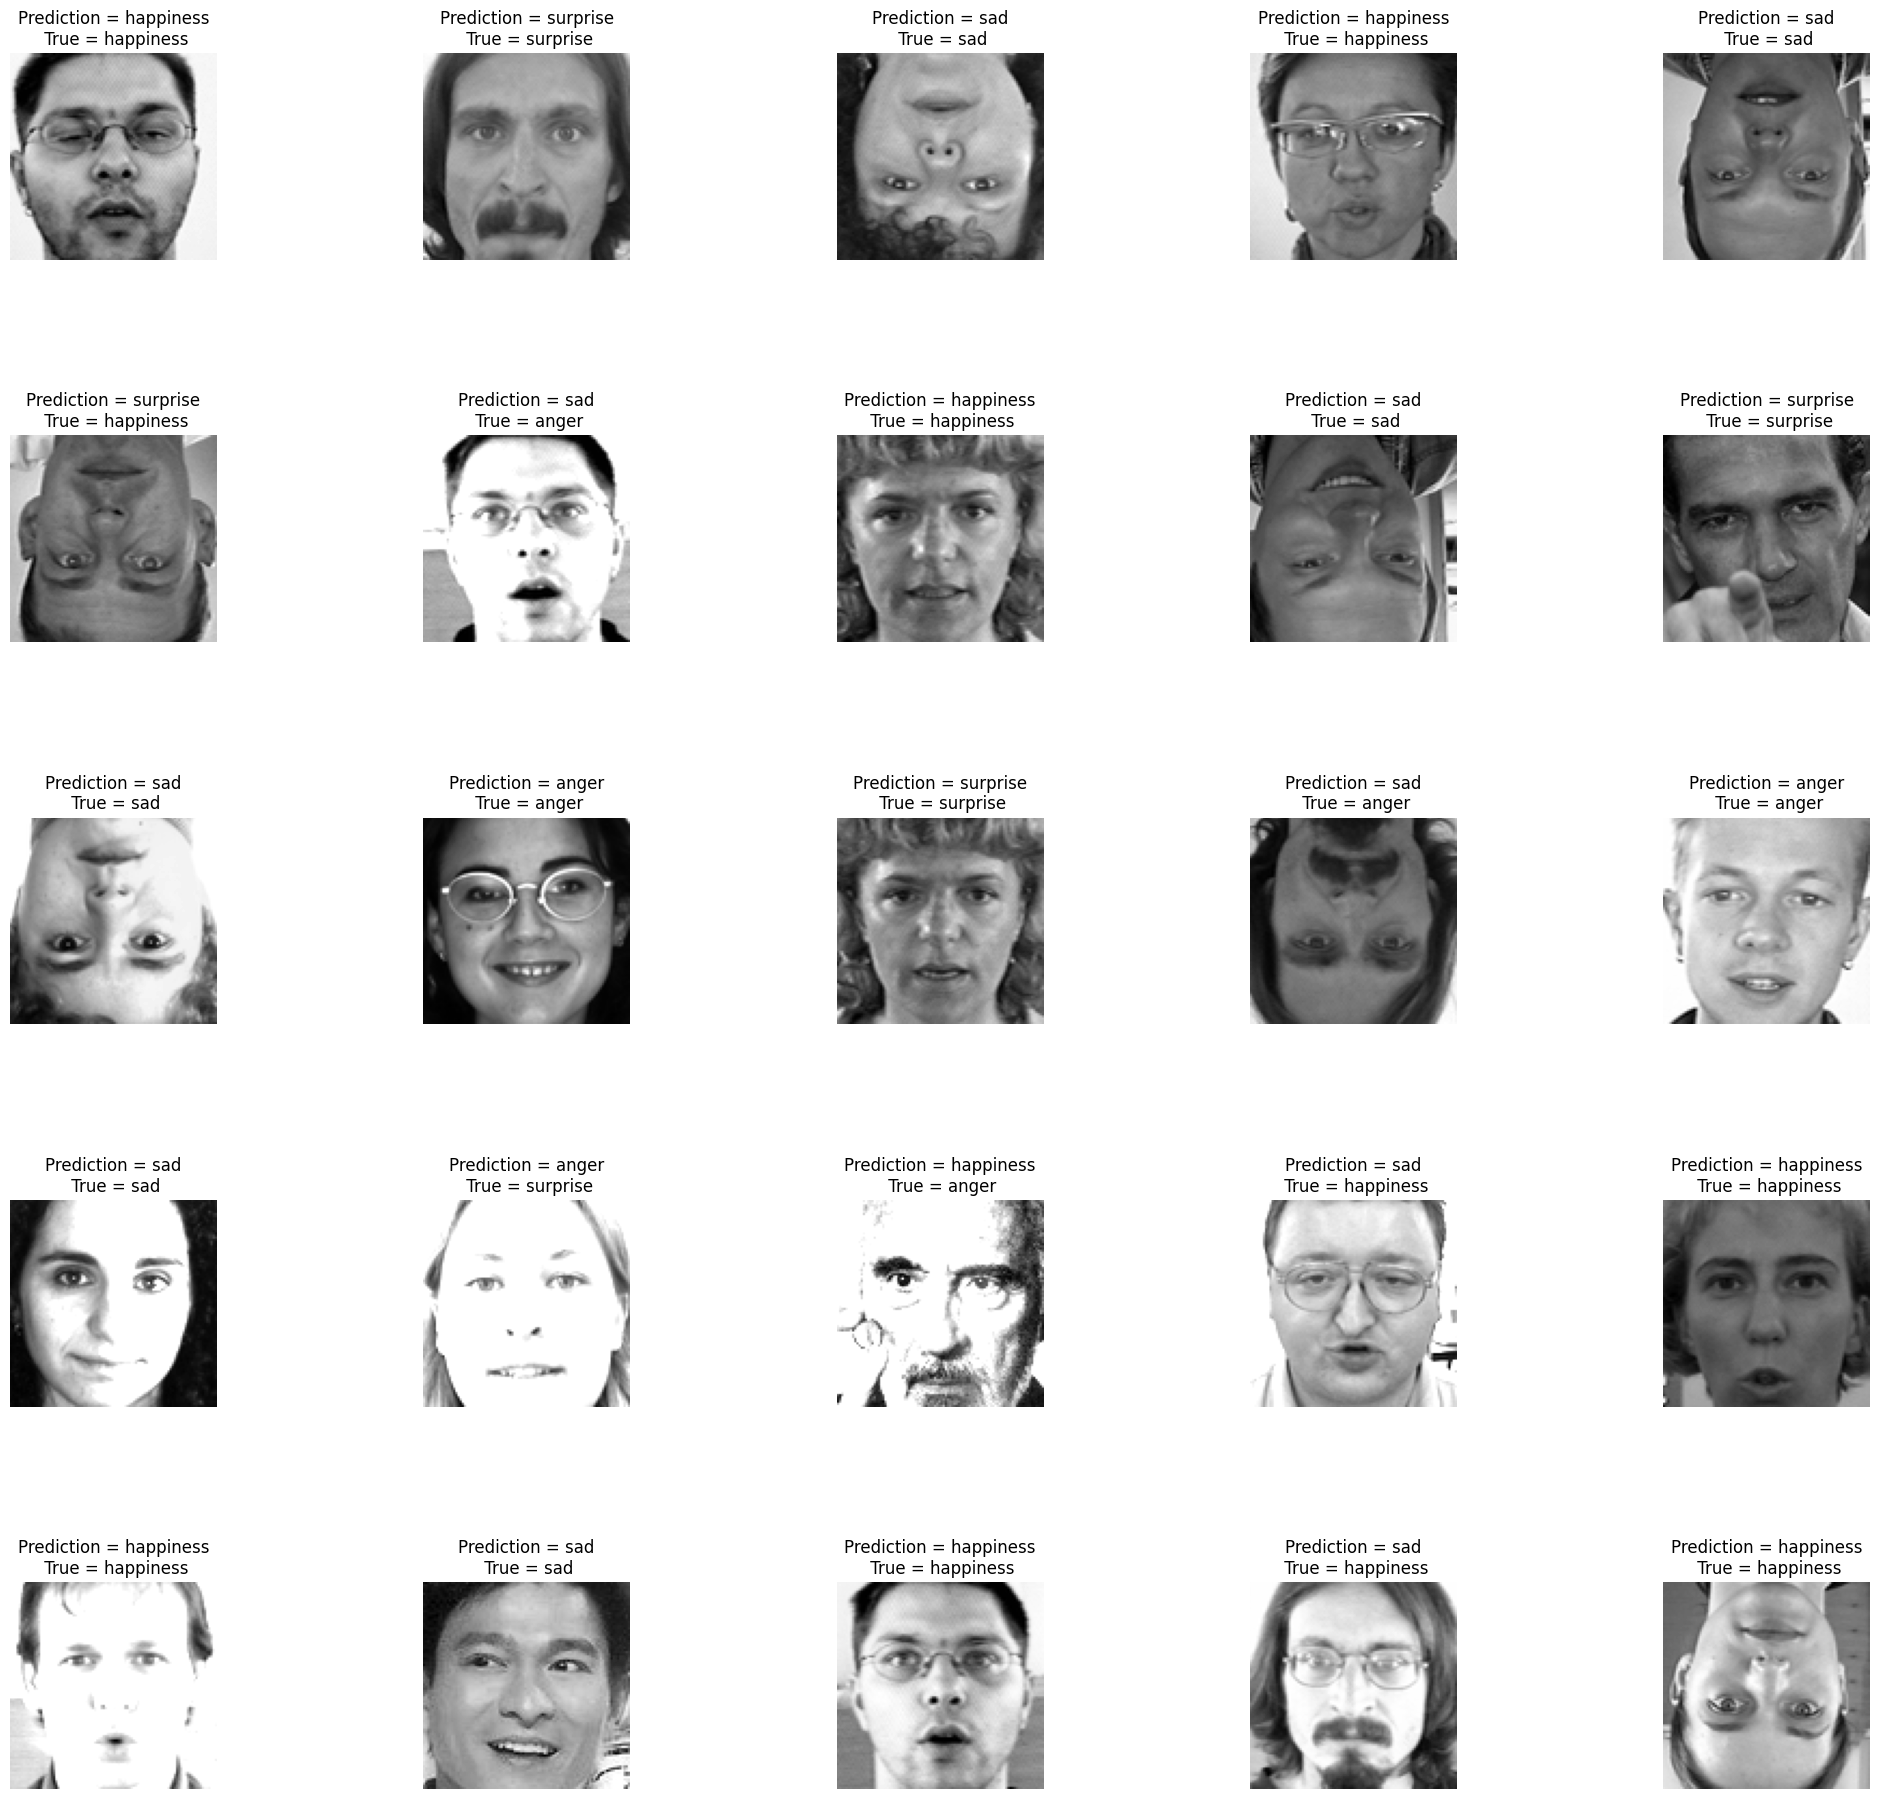

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57       248
           1       0.71      0.17      0.28        29
           2       0.67      0.70      0.69       308
           3       0.84      0.83      0.83       441
           4       0.71      0.86      0.78       203

    accuracy                           0.73      1229
   macro avg       0.71      0.62      0.63      1229
weighted avg       0.73      0.73      0.72      1229



# COMBINE BOTH FACIAL EXPRESSION AND FACIAL KEY POINTS DETECTION MODELS

In [ ]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

54/54 [==============================] - 1s 27ms/step


In [ ]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,30.239248,38.887127,68.049118,0.0,36.758812,38.959457,23.723198,39.560146,61.838211,38.447266,...,54.809059,33.078396,78.563087,65.210861,78.313385,49.918831,71.695381,49.731297,88.091774,0
1,58.022198,37.956024,40.395725,0.0,54.773674,38.633015,61.999401,37.947769,43.918297,38.271393,...,61.891872,56.221821,81.926361,41.549023,81.066444,48.577705,77.076103,48.516972,90.994751,4
2,69.416260,62.452427,28.750570,0.0,62.755699,61.544037,76.523026,61.241665,35.627991,60.605690,...,51.661194,65.121376,23.028614,34.692604,21.181236,49.286533,32.033489,49.915382,15.481336,4
3,29.919765,36.813972,67.294434,0.0,36.776478,37.381531,24.429325,37.474918,61.019135,37.441933,...,57.775993,33.374447,75.666260,62.235352,75.369797,47.725349,72.201241,47.464512,83.300163,4
4,69.845123,60.491703,28.994068,0.0,63.170753,59.831245,77.018532,58.974716,35.409863,60.406776,...,42.590836,64.513741,20.247288,33.563923,20.955608,48.065285,26.579149,48.278641,10.854247,3


<ipython-input-78-b6b1c6ed8fe0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


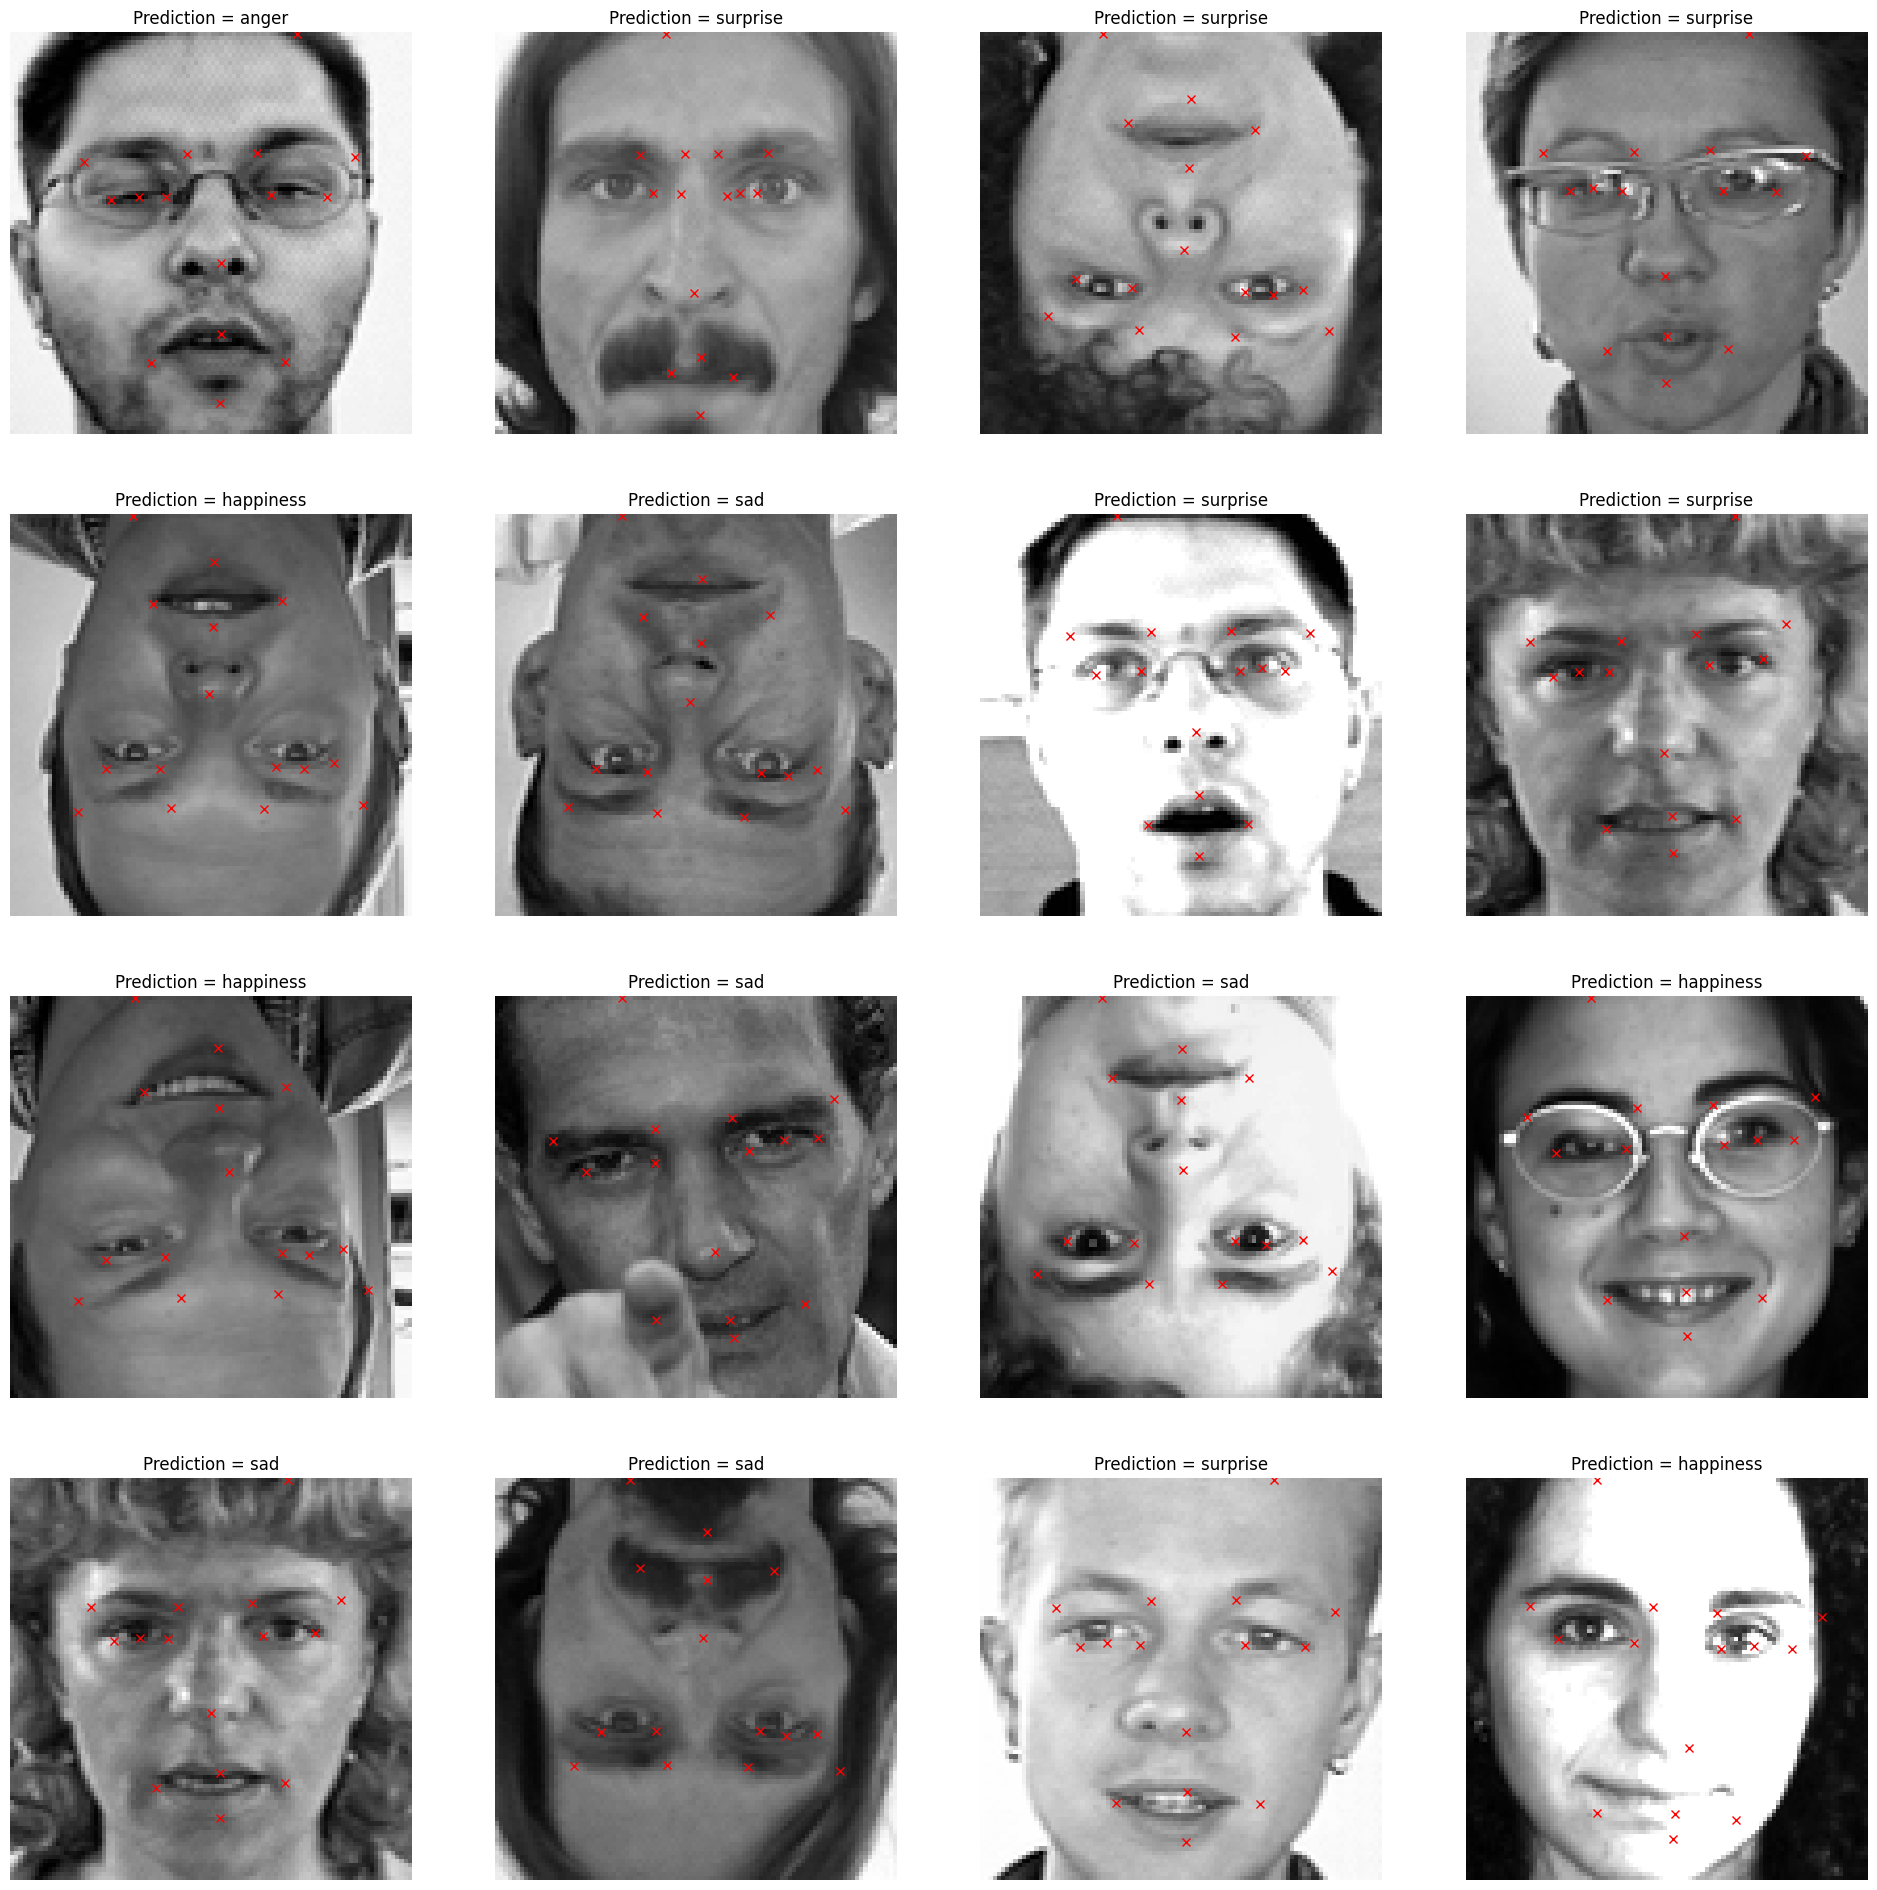

In [ ]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
